## Goal: Finding relationship of data through visualisation via charts, analysis and graphs

In [1]:
#import libaries
library(dplyr)
library(ggplot2)
library(cowplot)
library(corrplot)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘cowplot’ was built under R version 4.3.1”
corrplot 0.92 loaded



In [190]:
#read data file
df <- read.csv("../../Data/HR_Attrition.csv")
df3 <- read.csv("../../Data/HR_Attrition.csv")
df4 <- read.csv("../../Data/HR_Attrition.csv")
#Clean Data
df$Attrition <- ifelse(df['Attrition'] == "Yes",1,0)
df$Attrition <- as.numeric(df$Attrition)

df3$Attrition <- ifelse(df['Attrition'] == "Yes",1,0)
df3$Attrition <- as.numeric(df$Attrition)

#check for Duplicates
duplicates <- df[duplicated(df) | duplicated(df, fromLast = TRUE), ]

if (nrow(duplicates) > 0) {
  print("Duplicates found:")
  print(duplicates)
} else {
  print("No duplicates found.")
}

df %>% glimpse()

[1] "No duplicates found."
Rows: 1,470
Columns: 35
$ Age                      <int> 41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2…
$ Attrition                <dbl> 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, …
$ BusinessTravel           <chr> "Travel_Rarely", "Travel_Frequently", "Travel…
$ DailyRate                <int> 1102, 279, 1373, 1392, 591, 1005, 1324, 1358,…
$ Department               <chr> "Sales", "Research & Development", "Research …
$ DistanceFromHome         <int> 1, 8, 2, 3, 2, 2, 3, 24, 23, 27, 16, 15, 26, …
$ Education                <int> 2, 1, 2, 4, 1, 2, 3, 1, 3, 3, 3, 2, 1, 2, 3, …
$ EducationField           <chr> "Life Sciences", "Life Sciences", "Other", "L…
$ EmployeeCount            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ EmployeeNumber           <int> 1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,…
$ EnvironmentSatisfaction  <int> 2, 3, 4, 4, 1, 4, 3, 4, 4, 3, 1, 4, 1, 2, 3, …
$ Gender                   <chr> "Female", "Male", "Male", "Female", 

Dataset Overview: Response variable is Attrition with 35 features of a combination of numerical and categorical. There are 1470 data entry with clean and no missing data however there is only 237 – 16% "No" responses for Attrition which is rather low to the typical attrition rate.

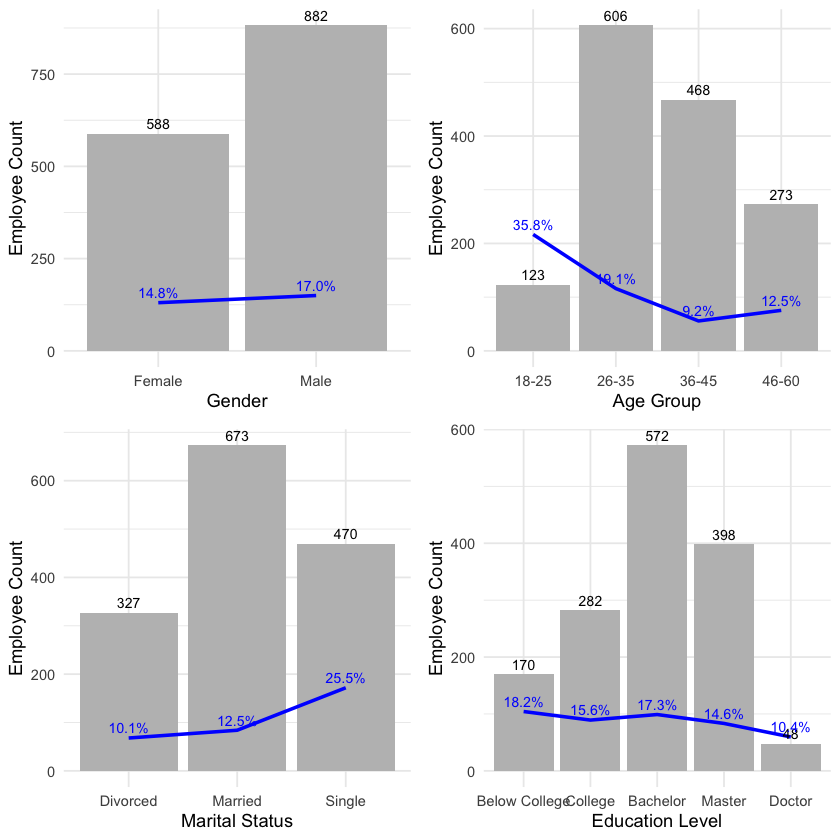

In [124]:

gender_counts <- df2 %>%
  group_by(Gender) %>%
  summarize(Count = n())

marital_counts <- df2 %>%
  group_by(MaritalStatus) %>%
  summarize(Count = n())

df2$Education_Level <- factor(df2$Education, levels = 1:5, labels = c('Below College', 'College', 'Bachelor', 'Master', 'Doctor'))
education_counts <- df2 %>%
  group_by(Education_Level) %>%
  summarize(Count = n())

attrition_gender <- df2 %>%
  group_by(Gender) %>%
  summarize(Attrition_Rate = mean(Attrition))

gender_data <- merge(gender_counts, attrition_gender, by = "Gender")

gender_plot <- ggplot(gender_data, aes(x = Gender)) +
  geom_bar(aes(y = Count), stat = "identity", fill = "grey") +
  geom_line(aes(y = Attrition_Rate * max(gender_counts$Count), group = 1, color = "blue"), size = 1) +
  geom_text(aes(y = Count, label = Count), vjust = -0.5, color = "black", size = 3) +
  geom_text(aes(y = Attrition_Rate * max(gender_counts$Count), label = sprintf("%.1f%%", Attrition_Rate * 100)), vjust = -0.5, color = "blue", size = 3) +
  scale_color_identity() +
  labs(x = "Gender", y = "Employee Count", color = "Attrition Rate") +
  theme_minimal()


attrition_marital <- df2 %>%
  group_by(MaritalStatus) %>%
  summarize(Attrition_Rate = mean(Attrition))

marital_data <- merge(marital_counts, attrition_marital, by = "MaritalStatus")


marital_plot <- ggplot(marital_data, aes(x = MaritalStatus)) +
  geom_bar(aes(y = Count), stat = "identity", fill = "grey") +
  geom_line(aes(y = Attrition_Rate * max(marital_counts$Count), group = 1, color = "blue"), size = 1) +
  geom_text(aes(y = Count, label = Count), vjust = -0.5, color = "black", size = 3) +
  geom_text(aes(y = Attrition_Rate * max(marital_counts$Count), label = sprintf("%.1f%%", Attrition_Rate * 100)), vjust = -0.5, color = "blue", size = 3) +
  scale_color_identity() +
  labs(x = "Marital Status", y = "Employee Count", color = "Attrition Rate") +
  theme_minimal()


attrition_education <- df2 %>%
  group_by(Education_Level) %>%
  summarize(Attrition_Rate = mean(Attrition))

education_data <- merge(education_counts, attrition_education, by = "Education_Level")

education_plot <- ggplot(education_data, aes(x = Education_Level)) +
  geom_bar(aes(y = Count), stat = "identity", fill = "grey") +
  geom_line(aes(y = Attrition_Rate * max(education_counts$Count), group = 1, color = "blue"), size = 1) +
  geom_text(aes(y = Count, label = Count), vjust = -0.5, color = "black", size = 3) +
  geom_text(aes(y = Attrition_Rate * max(education_counts$Count), label = sprintf("%.1f%%", Attrition_Rate * 100)), vjust = -0.5, color = "blue", size = 3) +
  scale_color_identity() +
  labs(x = "Education Level", y = "Employee Count", color = "Attrition Rate") +
  theme_minimal()

df2$Age_Group <- cut(df2$Age, breaks = c(17, 25, 35, 45, 60), labels = c("18-25", "26-35", "36-45", "46-60"))



age_counts <- df2 %>%
  group_by(Age_Group) %>%
  summarize(Count = n())


attrition_rate <- df2 %>%
  group_by(Age_Group) %>%
  summarize(Attrition_Rate = mean(Attrition))


age_data <- merge(age_counts, attrition_rate, by = "Age_Group")


age_plot <- ggplot(age_data, aes(x = Age_Group)) +
  geom_bar(aes(y = Count), stat = "identity", fill = "grey") +
  geom_line(aes(y = Attrition_Rate * max(age_counts$Count), group = 1, color = "blue"), size = 1) +
  geom_text(aes(y = Count, label = Count), vjust = -0.5, color = "black", size = 3) +
  geom_text(aes(y = Attrition_Rate * max(age_counts$Count), label = sprintf("%.1f%%", Attrition_Rate * 100)), vjust = -0.5, color = "blue", size = 3) +
  scale_color_identity() +
  labs(x = "Age Group", y = "Employee Count", color = "Attrition Rate") +
  theme_minimal()

grid.arrange(gender_plot, age_plot, marital_plot, education_plot, ncol = 2)


Demographics Analysis
Deep diving demographic categories such as gender, age, marital status, and education. Through this analysis, we identified the following regarding attrition:

* Gender: While the company has an imbalanced male-to-female ratio, the percentage of attrition is marginal between both genders.
* Age: Grouping ages into different age groups, we observed a trend of younger individuals 18-25 followed by those aged 26-35 having a higher attrition rate compared to other age groups.
* Marital Status: Singles have a higher attrition rate compared to divorced and married individuals. This could stem from singles having fewer responsibilities and commitments, allowing for more change.
* Education: No distinct visual trends were detected, with a slightly lower attrition rate for individuals with a “Doctor”.


Attrition_Status
Currently Working in Company             Left the Company 
                        1233                          237 


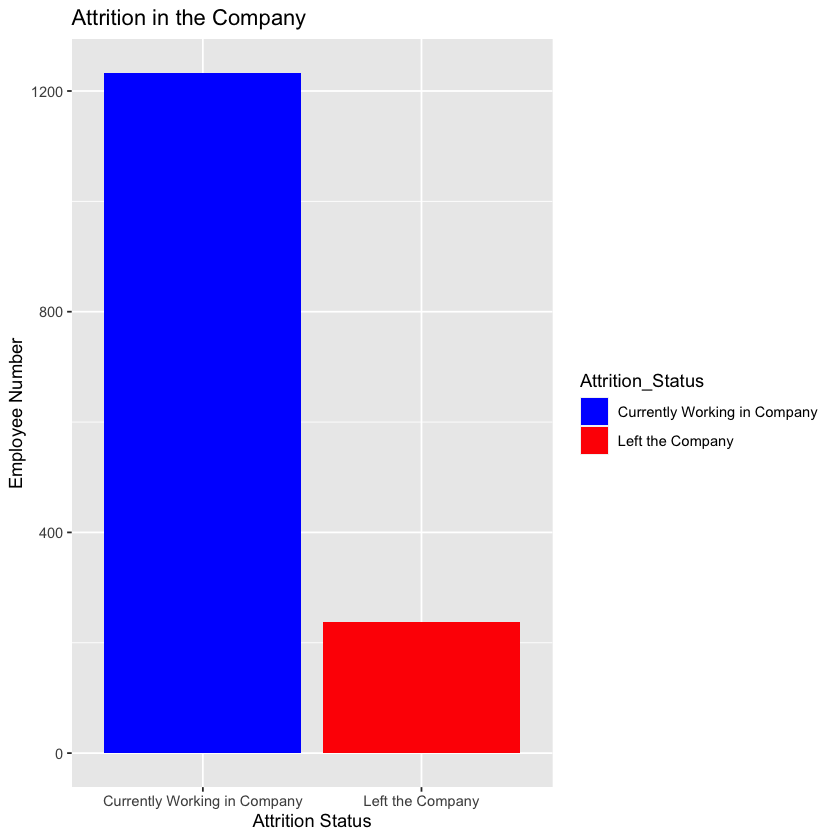

In [28]:
df2 <- df
Attrition_Status <- ifelse(df2$Attrition == 0, 'Currently Working in Company', 'Left the Company')

df2 %>%
  ggplot(aes(x = Attrition_Status, fill = Attrition_Status)) +
  geom_bar() +
  scale_fill_manual(values = c('Currently Working in Company' = 'blue', 'Left the Company' = 'red')) +
  labs(title = 'Attrition in the Company',
       x = 'Attrition Status',
       y = 'Employee Number')

print(table(Attrition_Status))

In [33]:
summary(df)

      Age          Attrition      BusinessTravel       DailyRate     
 Min.   :18.00   Min.   :0.0000   Length:1470        Min.   : 102.0  
 1st Qu.:30.00   1st Qu.:0.0000   Class :character   1st Qu.: 465.0  
 Median :36.00   Median :0.0000   Mode  :character   Median : 802.0  
 Mean   :36.92   Mean   :0.1612                      Mean   : 802.5  
 3rd Qu.:43.00   3rd Qu.:0.0000                      3rd Qu.:1157.0  
 Max.   :60.00   Max.   :1.0000                      Max.   :1499.0  
  Department        DistanceFromHome   Education     EducationField    
 Length:1470        Min.   : 1.000   Min.   :1.000   Length:1470       
 Class :character   1st Qu.: 2.000   1st Qu.:2.000   Class :character  
 Mode  :character   Median : 7.000   Median :3.000   Mode  :character  
                    Mean   : 9.193   Mean   :2.913                     
                    3rd Qu.:14.000   3rd Qu.:4.000                     
                    Max.   :29.000   Max.   :5.000                     
 Emplo

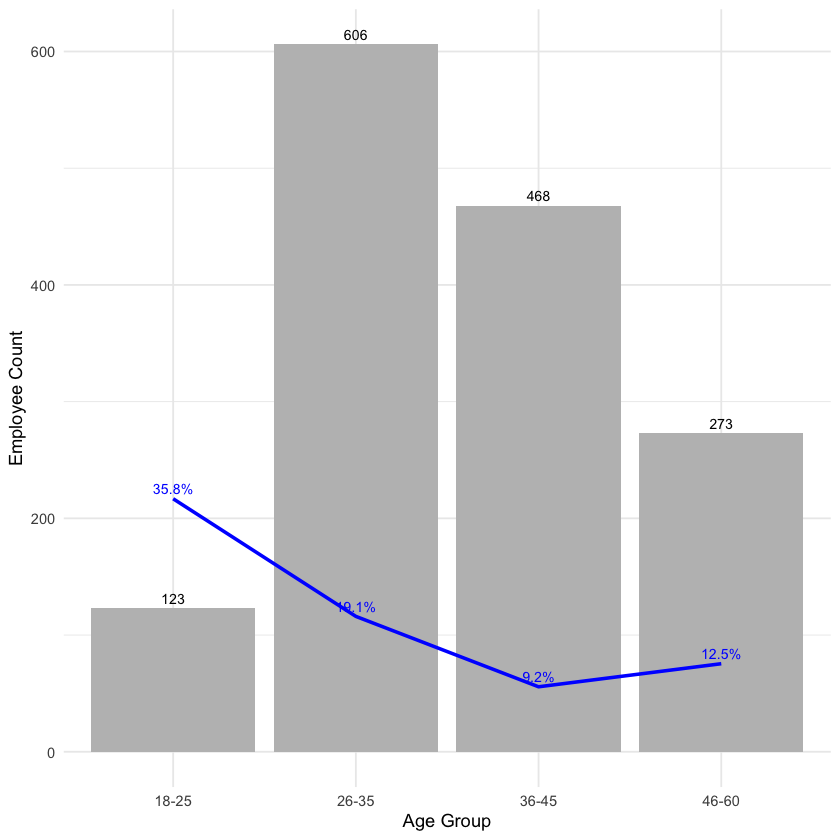

In [122]:
df2$Age_Group <- cut(df2$Age, breaks = c(17, 25, 35, 45, 60), labels = c("18-25", "26-35", "36-45", "46-60"))



age_counts <- df2 %>%
  group_by(Age_Group) %>%
  summarize(Count = n())


attrition_rate <- df2 %>%
  group_by(Age_Group) %>%
  summarize(Attrition_Rate = mean(Attrition))


age_data <- merge(age_counts, attrition_rate, by = "Age_Group")


ggplot(age_data, aes(x = Age_Group)) +
  geom_bar(aes(y = Count), stat = "identity", fill = "grey") +
  geom_line(aes(y = Attrition_Rate * max(age_counts$Count), group = 1, color = "blue"), size = 1) +
  geom_text(aes(y = Count, label = Count), vjust = -0.5, color = "black", size = 3) +
  geom_text(aes(y = Attrition_Rate * max(age_counts$Count), label = sprintf("%.1f%%", Attrition_Rate * 100)), vjust = -0.5, color = "blue", size = 3) +
  scale_color_identity() +
  labs(x = "Age Group", y = "Employee Count", color = "Attrition Rate") +
  theme_minimal()

Attrition rate are mainly higher with the younger group of folks primarily in Ages < 25 and followed by 26-35.We can see that around the ages of 36-45, indviduals would tend to stay within the same place.

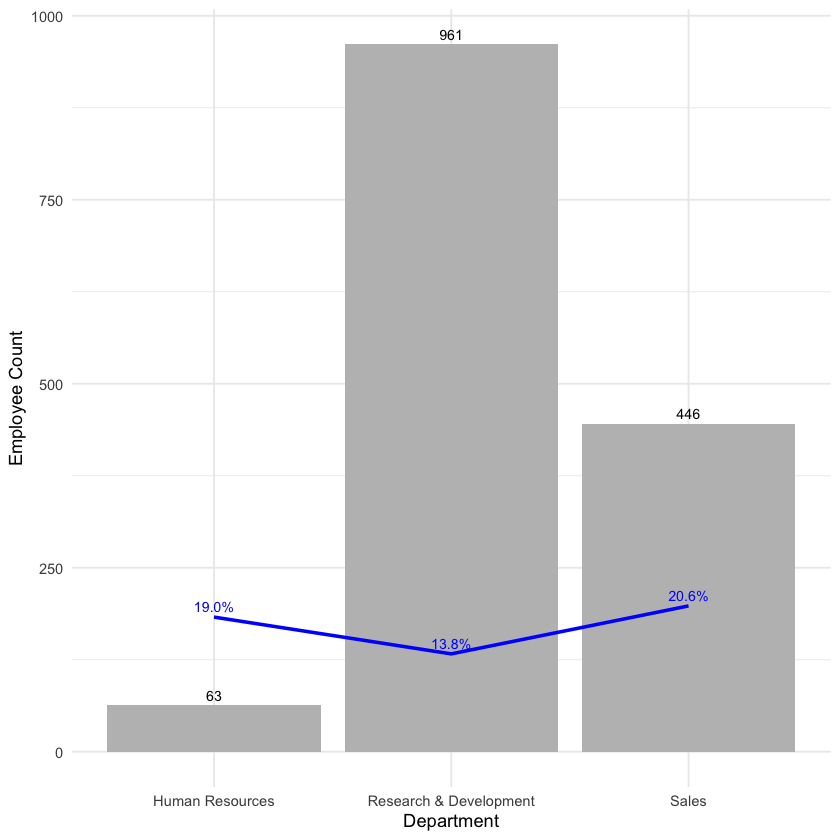

In [59]:
dept_counts <- df2 %>%
  group_by(Department) %>%
  summarize(Count = n())


attrition_rate_dept <- df2 %>%
  group_by(Department) %>%
  summarize(Attrition_Rate = mean(Attrition))


dept_data <- merge(dept_counts, attrition_rate_dept, by = "Department")


ggplot(dept_data, aes(x = Department)) +
  geom_bar(aes(y = Count), stat = "identity", fill = "grey") +
  geom_line(aes(y = Attrition_Rate * max(dept_counts$Count), group = 1, color = "blue"), size = 1) +
  geom_text(aes(y = Count, label = Count), vjust = -0.5, color = "black", size = 3) +
  geom_text(aes(y = Attrition_Rate * max(dept_counts$Count), label = sprintf("%.1f%%", Attrition_Rate * 100)), vjust = -0.5, color = "blue", size = 3) +
  scale_color_identity() +
  labs(x = "Department", y = "Employee Count", color = "Attrition Rate") +
  theme_minimal()

Attrition are highest with Sales and HR while R&D is the most stablest. This could be due to the nature of the job leading to high turnovers.

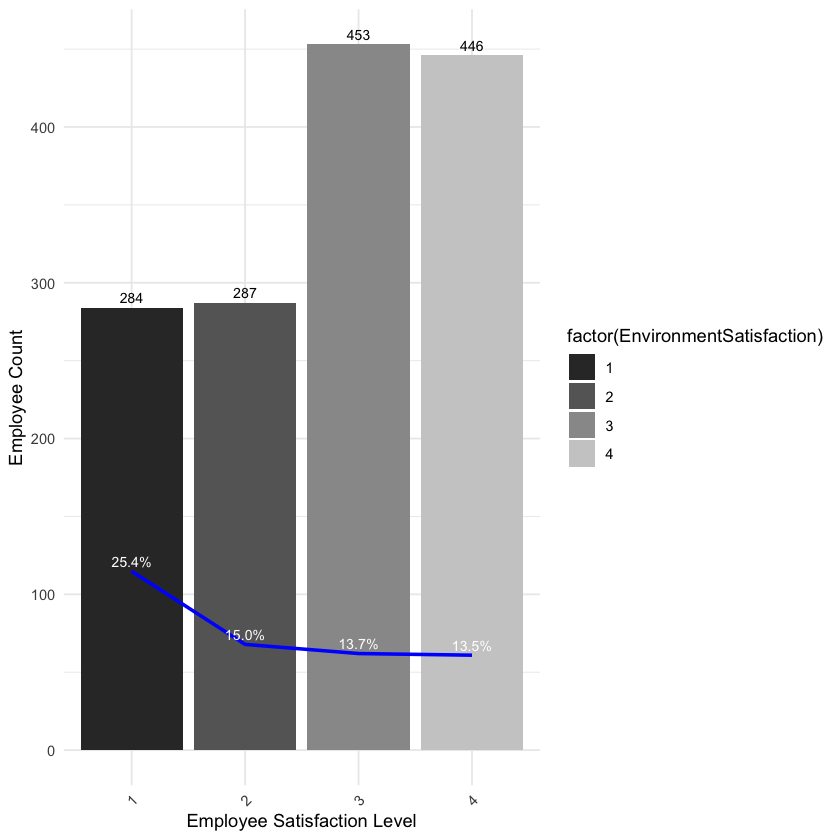

In [67]:
satisfaction_counts <- df2 %>%
  group_by(EnvironmentSatisfaction) %>%
  summarize(Count = n())


attrition_rate_satisfaction <- df2 %>%
  group_by(EnvironmentSatisfaction) %>%
  summarize(Attrition_Rate = mean(Attrition))


satisfaction_data <- merge(satisfaction_counts, attrition_rate_satisfaction, by = "EnvironmentSatisfaction")


ggplot(satisfaction_data, aes(x = factor(EnvironmentSatisfaction), y = Count, fill = factor(EnvironmentSatisfaction))) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = Count), vjust = -0.5, color = "black", size = 3) +
  labs(x = "Employee Satisfaction Level", y = "Employee Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(values = c("#333333", "#666666", "#999999", "#CCCCCC")) +
  geom_line(aes(y = Attrition_Rate * max(satisfaction_counts$Count), group = 1, color = "blue"), size = 1) +
  geom_text(aes(y = Attrition_Rate * max(satisfaction_counts$Count), label = paste0(sprintf("%.1f", Attrition_Rate * 100), "%")), vjust = -0.5, color = "white", size = 3) +
  scale_color_identity() +
  labs(color = "Attrition Rate")

As anticipated, employee with the lowest satisfaction level leads to higher attrition rate as compared to employees with higher satisfaction level

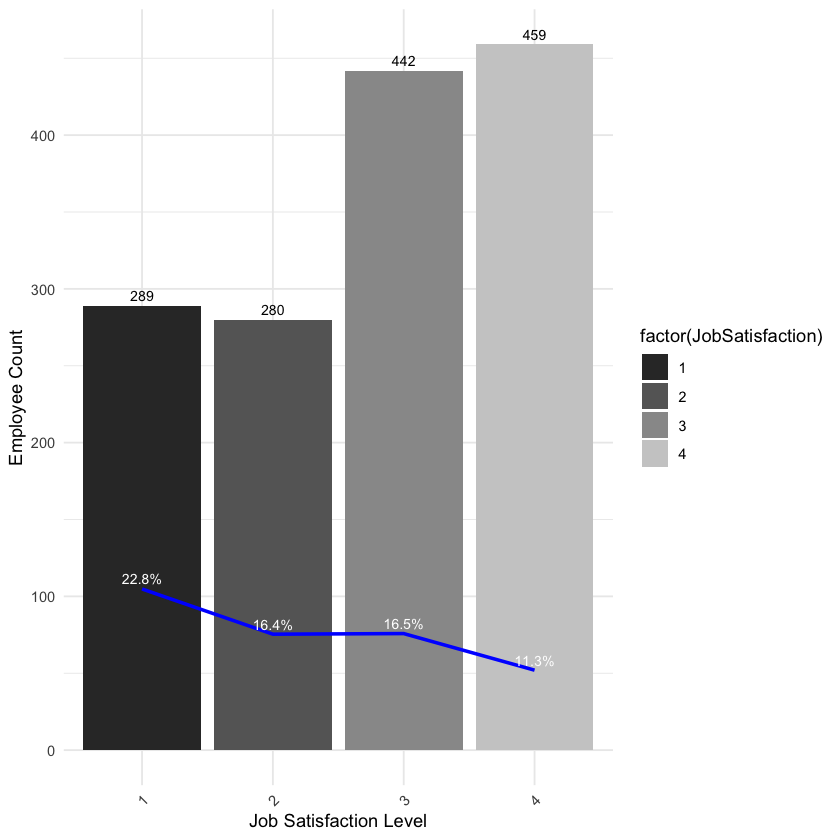

In [79]:
jobsatisfaction_counts <- df2 %>%
  group_by(JobSatisfaction) %>%
  summarize(Count = n())


attrition_rate_jobsatisfaction <- df2 %>%
  group_by(JobSatisfaction) %>%
  summarize(Attrition_Rate = mean(Attrition))


jobsatisfaction_data <- merge(jobsatisfaction_counts, attrition_rate_jobsatisfaction, by = "JobSatisfaction")


ggplot(jobsatisfaction_data, aes(x = factor(JobSatisfaction), y = Count, fill = factor(JobSatisfaction))) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = Count), vjust = -0.5, color = "black", size = 3) +
  labs(x = "Job Satisfaction Level", y = "Employee Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(values = c("#333333", "#666666", "#999999", "#CCCCCC")) +
  geom_line(aes(y = Attrition_Rate * max(jobsatisfaction_counts$Count), group = 1, color = "blue"), size = 1) +
  geom_text(aes(y = Attrition_Rate * max(jobsatisfaction_counts$Count), label = paste0(sprintf("%.1f", Attrition_Rate * 100), "%")), vjust = -0.5, color = "white", size = 3) +
  scale_color_identity() +
  labs(color = "Attrition Rate")

Individuals with higher job statisfaction would tend to not have higher attrition.

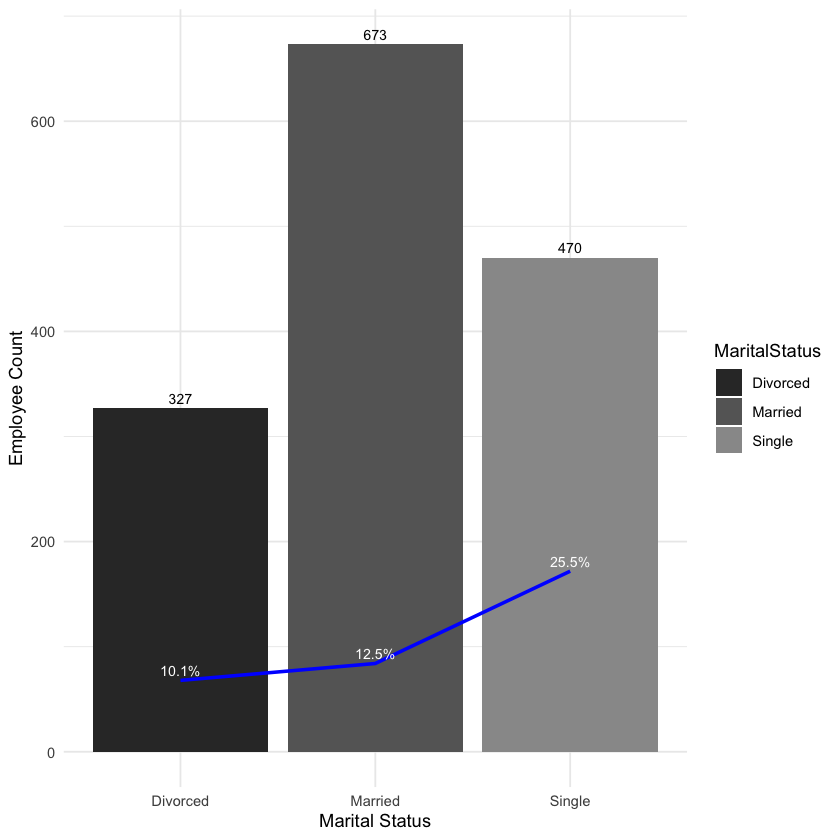

In [83]:
maritalstatus_counts <- df2 %>%
  group_by(MaritalStatus) %>%
  summarize(Count = n())


attrition_rate_maritalstatus <- df2 %>%
  group_by(MaritalStatus) %>%
  summarize(Attrition_Rate = mean(Attrition))


maritalstatus_data <- merge(maritalstatus_counts, attrition_rate_maritalstatus, by = "MaritalStatus")


ggplot(maritalstatus_data, aes(x = MaritalStatus, y = Count, fill = MaritalStatus)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = Count), vjust = -0.5, color = "black", size = 3) +
  labs(x = "Marital Status", y = "Employee Count") +
  theme_minimal() +
  scale_fill_manual(values = c("#333333", "#666666", "#999999")) +  # Gradient of gray shades from light to dark
  geom_line(aes(y = Attrition_Rate * max(maritalstatus_counts$Count), group = 1, color = "blue"), size = 1) +
  geom_text(aes(y = Attrition_Rate * max(maritalstatus_counts$Count), label = paste0(sprintf("%.1f", Attrition_Rate * 100), "%")), vjust = -0.5, color = "white", size = 3) +
  scale_color_identity() +
  labs(color = "Attrition Rate")

Assuming that martial status with Married and Divorced have high commitments, Single tend to have higher attrition.

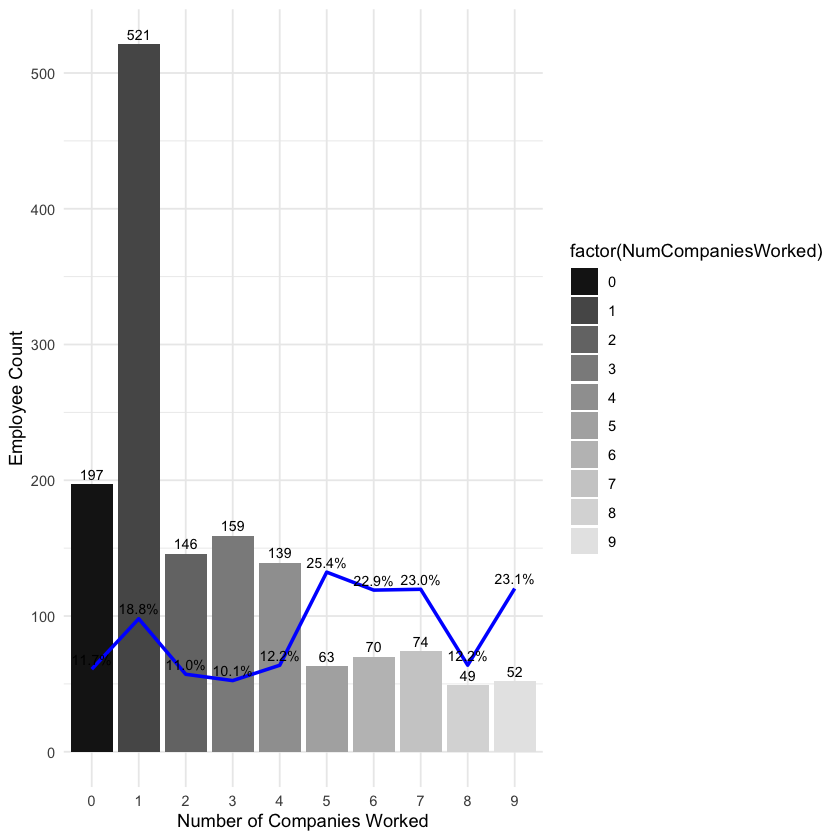

In [84]:
numcompaniesworked_counts <- df2 %>%
  group_by(NumCompaniesWorked) %>%
  summarize(Count = n())


attrition_rate_numcompaniesworked <- df2 %>%
  group_by(NumCompaniesWorked) %>%
  summarize(Attrition_Rate = mean(Attrition))


numcompaniesworked_data <- merge(numcompaniesworked_counts, attrition_rate_numcompaniesworked, by = "NumCompaniesWorked")


ggplot(numcompaniesworked_data, aes(x = factor(NumCompaniesWorked), y = Count, fill = factor(NumCompaniesWorked))) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = Count), vjust = -0.5, color = "black", size = 3) +
  labs(x = "Number of Companies Worked", y = "Employee Count") +
  theme_minimal() +
  scale_fill_grey(start = 0.1, end = 0.9) +  # Gradient of gray shades from light to dark
  geom_line(aes(y = Attrition_Rate * max(numcompaniesworked_counts$Count), group = 1, color = "blue"), size = 1) +
  geom_text(aes(y = Attrition_Rate * max(numcompaniesworked_counts$Count), label = paste0(sprintf("%.1f", Attrition_Rate * 100), "%")), vjust = -0.5, color = "black", size = 3) +
  scale_color_identity() +
  labs(color = "Attrition Rate")

There is a visible trend that individuals work in 1 company would tend to leave while indivudals who have worked >3 company < 3 would stay longer. Lastly, we have our serial attrition folks that often leave after joining more than 5 companies.

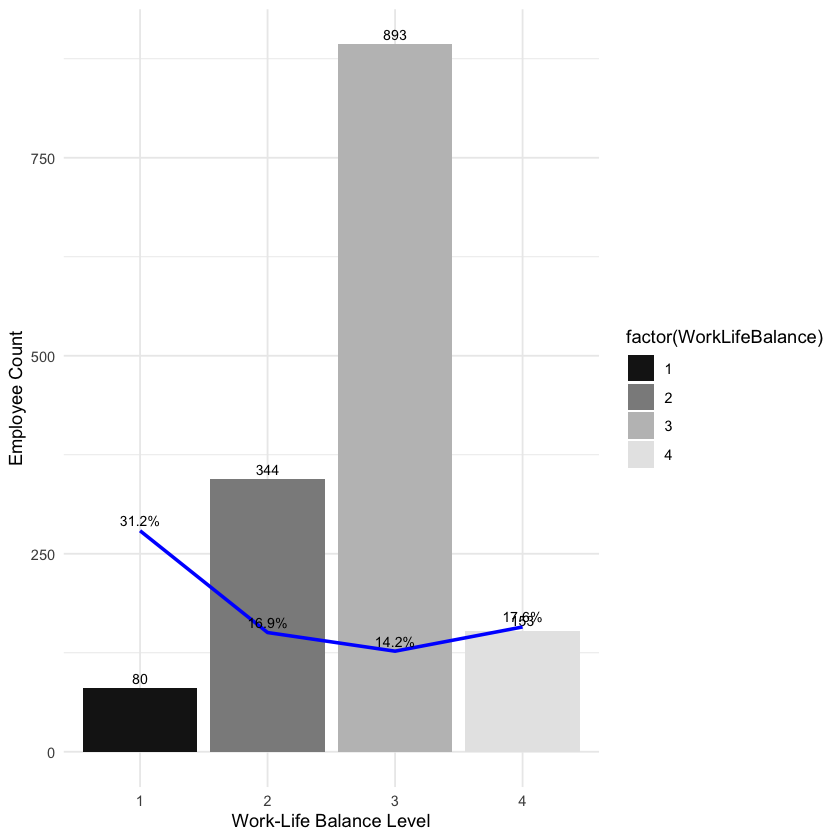

In [85]:
worklifebalance_counts <- df2 %>%
  group_by(WorkLifeBalance) %>%
  summarize(Count = n())


attrition_rate_worklifebalance <- df2 %>%
  group_by(WorkLifeBalance) %>%
  summarize(Attrition_Rate = mean(Attrition))


worklifebalance_data <- merge(worklifebalance_counts, attrition_rate_worklifebalance, by = "WorkLifeBalance")

ggplot(worklifebalance_data, aes(x = factor(WorkLifeBalance), y = Count, fill = factor(WorkLifeBalance))) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = Count), vjust = -0.5, color = "black", size = 3) +
  labs(x = "Work-Life Balance Level", y = "Employee Count") +
  theme_minimal() +
  scale_fill_grey(start = 0.1, end = 0.9) +  # Gradient of gray shades from light to dark
  geom_line(aes(y = Attrition_Rate * max(worklifebalance_counts$Count), group = 1, color = "blue"), size = 1) +
  geom_text(aes(y = Attrition_Rate * max(worklifebalance_counts$Count), label = paste0(sprintf("%.1f", Attrition_Rate * 100), "%")), vjust = -0.5, color = "black", size = 3) +
  scale_color_identity() +
  labs(color = "Attrition Rate")

Individuals with poor worklife balance tend to have higher attrition

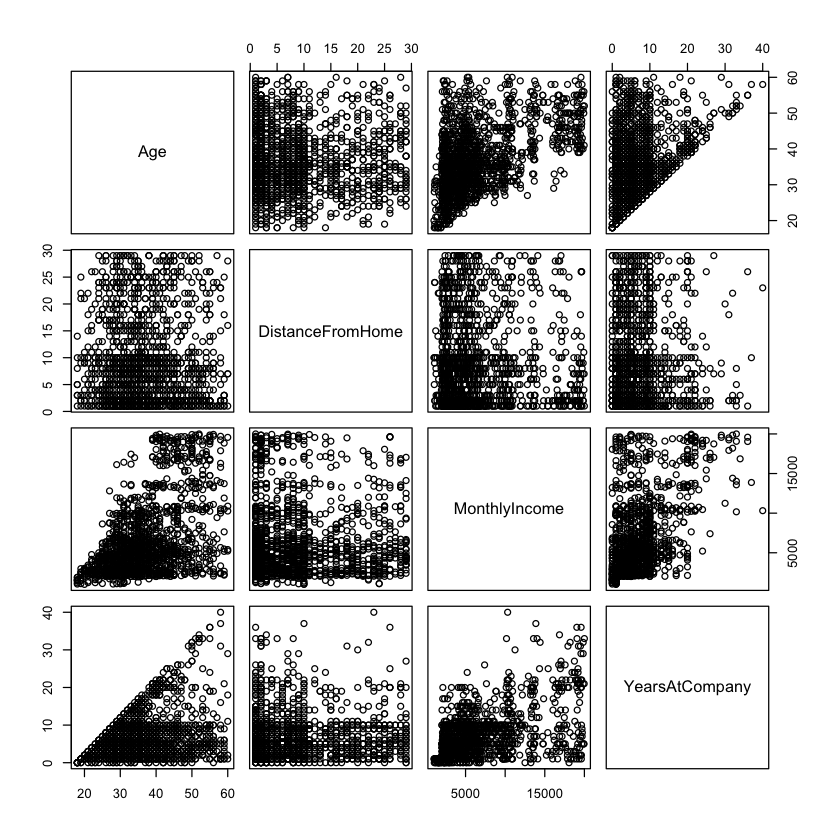

In [111]:
selected_vars <- c("Age", "DistanceFromHome", "MonthlyIncome", "YearsAtCompany")

# Create a subset of the dataframe with the selected variables
selected_df <- df2[, selected_vars]

pairs(selected_df, labels = selected_vars)

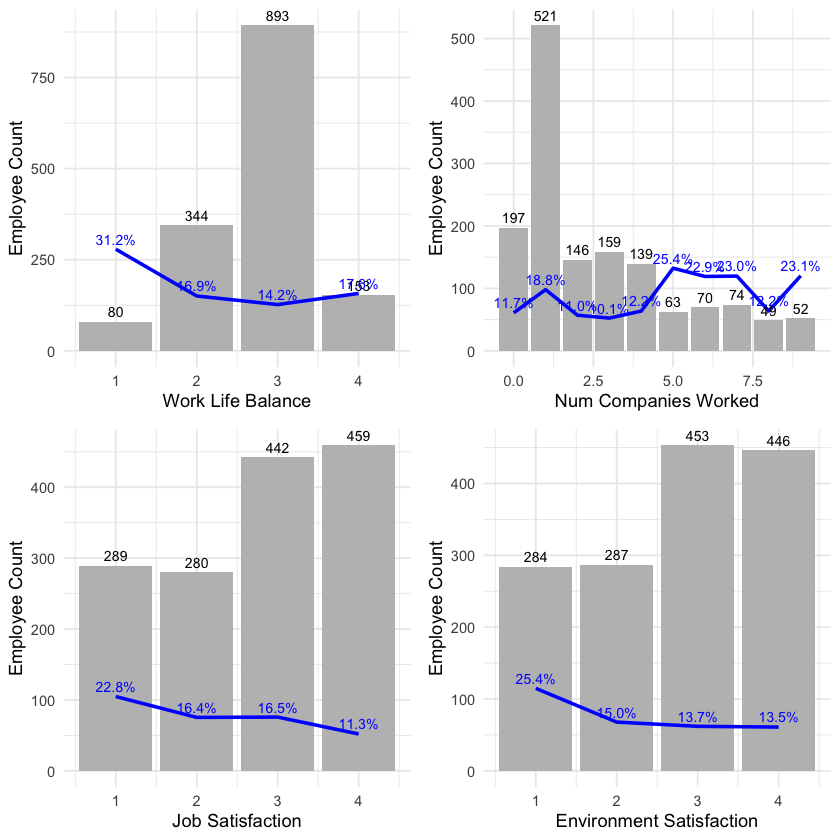

In [128]:

work_life_counts <- df2 %>%
  group_by(WorkLifeBalance) %>%
  summarize(Count = n())


attrition_work_life <- df2 %>%
  group_by(WorkLifeBalance) %>%
  summarize(Attrition_Rate = mean(Attrition))

work_life_data <- merge(work_life_counts, attrition_work_life, by = "WorkLifeBalance")


work_life_plot <- ggplot(work_life_data, aes(x = WorkLifeBalance)) +
  geom_bar(aes(y = Count), stat = "identity", fill = "grey") +
  geom_line(aes(y = Attrition_Rate * max(work_life_counts$Count), group = 1, color = "blue"), size = 1) +
  geom_text(aes(y = Count, label = Count), vjust = -0.5, color = "black", size = 3) +
  geom_text(aes(y = Attrition_Rate * max(work_life_counts$Count), label = sprintf("%.1f%%", Attrition_Rate * 100)), vjust = -0.5, color = "blue", size = 3) +
  scale_color_identity() +
  labs(x = "Work Life Balance", y = "Employee Count", color = "Attrition Rate") +
  theme_minimal()


num_companies_counts <- df2 %>%
  group_by(NumCompaniesWorked) %>%
  summarize(Count = n())


attrition_num_companies <- df2 %>%
  group_by(NumCompaniesWorked) %>%
  summarize(Attrition_Rate = mean(Attrition))

num_companies_data <- merge(num_companies_counts, attrition_num_companies, by = "NumCompaniesWorked")


num_companies_plot <- ggplot(num_companies_data, aes(x = NumCompaniesWorked)) +
  geom_bar(aes(y = Count), stat = "identity", fill = "grey") +
  geom_line(aes(y = Attrition_Rate * max(num_companies_counts$Count), group = 1, color = "blue"), size = 1) +
  geom_text(aes(y = Count, label = Count), vjust = -0.5, color = "black", size = 3) +
  geom_text(aes(y = Attrition_Rate * max(num_companies_counts$Count), label = sprintf("%.1f%%", Attrition_Rate * 100)), vjust = -0.5, color = "blue", size = 3) +
  scale_color_identity() +
  labs(x = "Num Companies Worked", y = "Employee Count", color = "Attrition Rate") +
  theme_minimal()


job_satisfaction_counts <- df2 %>%
  group_by(JobSatisfaction) %>%
  summarize(Count = n())


attrition_job_satisfaction <- df2 %>%
  group_by(JobSatisfaction) %>%
  summarize(Attrition_Rate = mean(Attrition))

job_satisfaction_data <- merge(job_satisfaction_counts, attrition_job_satisfaction, by = "JobSatisfaction")


job_satisfaction_plot <- ggplot(job_satisfaction_data, aes(x = JobSatisfaction)) +
  geom_bar(aes(y = Count), stat = "identity", fill = "grey") +
  geom_line(aes(y = Attrition_Rate * max(job_satisfaction_counts$Count), group = 1, color = "blue"), size = 1) +
  geom_text(aes(y = Count, label = Count), vjust = -0.5, color = "black", size = 3) +
  geom_text(aes(y = Attrition_Rate * max(job_satisfaction_counts$Count), label = sprintf("%.1f%%", Attrition_Rate * 100)), vjust = -0.5, color = "blue", size = 3) +
  scale_color_identity() +
  labs(x = "Job Satisfaction", y = "Employee Count", color = "Attrition Rate") +
  theme_minimal()


environment_satisfaction_counts <- df2 %>%
  group_by(EnvironmentSatisfaction) %>%
  summarize(Count = n())


attrition_environment_satisfaction <- df2 %>%
  group_by(EnvironmentSatisfaction) %>%
  summarize(Attrition_Rate = mean(Attrition))

environment_satisfaction_data <- merge(environment_satisfaction_counts, attrition_environment_satisfaction, by = "EnvironmentSatisfaction")


environment_satisfaction_plot <- ggplot(environment_satisfaction_data, aes(x = EnvironmentSatisfaction)) +
  geom_bar(aes(y = Count), stat = "identity", fill = "grey") +
  geom_line(aes(y = Attrition_Rate * max(environment_satisfaction_counts$Count), group = 1, color = "blue"), size = 1) +
  geom_text(aes(y = Count, label = Count), vjust = -0.5, color = "black", size = 3) +
  geom_text(aes(y = Attrition_Rate * max(environment_satisfaction_counts$Count), label = sprintf("%.1f%%", Attrition_Rate * 100)), vjust = -0.5, color = "blue", size = 3) +
  scale_color_identity() +
  labs(x = "Environment Satisfaction", y = "Employee Count", color = "Attrition Rate") +
  theme_minimal()


grid.arrange(work_life_plot, num_companies_plot, job_satisfaction_plot, environment_satisfaction_plot, ncol = 2)


In our next phase, we delved into core and internal job-related metrics to uncover visual relationships with attrition. Through this analysis, we noticed (Note: For scoring categories 1=weak and 4=Best) : 

* Work-Life Balance: A notable trend emerged, showing higher attrition among individuals with lower scores for work-life balance.
* Number of Companies Worked For: We observed a higher attrition rate among individuals at their second job, followed by a plateau before seeing higher attrition among "serial job movers."
* Job Satisfaction: There was a clear negative correlation between attrition and higher job satisfaction.
* Environment Satisfaction: We found that the lowest score in this category was associated with a significant attrition rate, while other scores did not indicate clear trends.


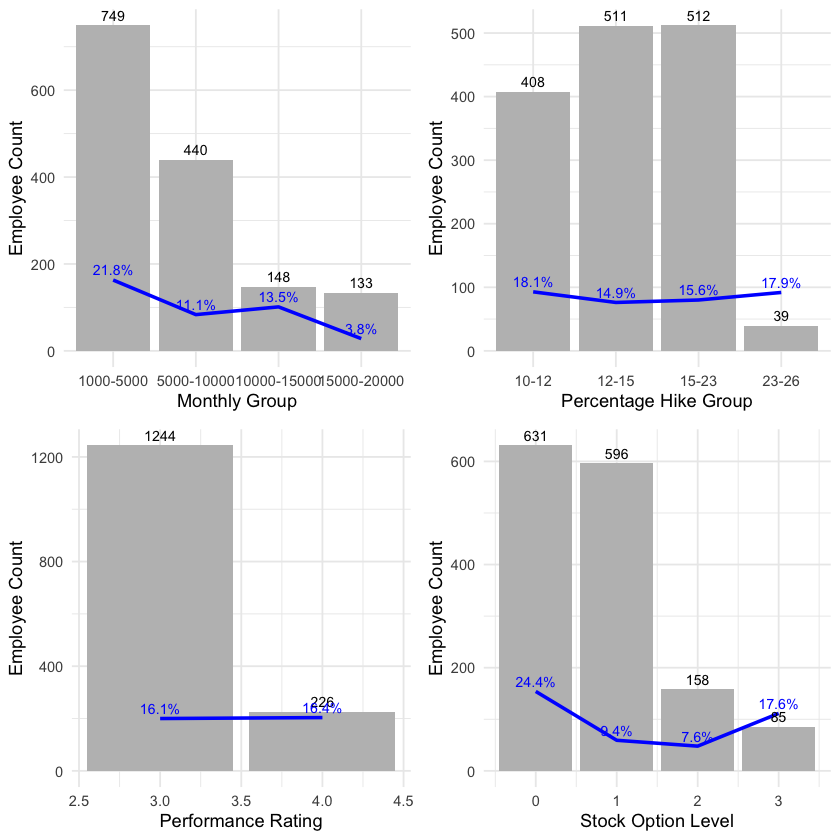

In [152]:
percentsalaryhike_counts <- df2 %>%
  group_by(PercentSalaryHike) %>%
  summarize(Count = n())


performancerating_counts <- df2 %>%
  group_by(PerformanceRating) %>%
  summarize(Count = n())


stockoptionlevel_counts <- df2 %>%
  group_by(StockOptionLevel) %>%
  summarize(Count = n())






df2$Percent_Group <- cut(df2$PercentSalaryHike, breaks = c(10, 12, 15, 23, 26), labels = c("10-12", "12-15", "15-23", "23-26"))



percent_counts <- df2 %>%
  group_by(Percent_Group) %>%
  summarize(Count = n())


attrition_rate <- df2 %>%
  group_by(Percent_Group) %>%
  summarize(Attrition_Rate = mean(Attrition))


age_data <- merge(percent_counts, attrition_rate, by = "Percent_Group")


percentsalaryhike_plot <- ggplot(age_data, aes(x = Percent_Group)) +
  geom_bar(aes(y = Count), stat = "identity", fill = "grey") +
  geom_line(aes(y = Attrition_Rate * max(percent_counts$Count), group = 1, color = "blue"), size = 1) +
  geom_text(aes(y = Count, label = Count), vjust = -0.5, color = "black", size = 3) +
  geom_text(aes(y = Attrition_Rate * max(percent_counts$Count), label = sprintf("%.1f%%", Attrition_Rate * 100)), vjust = -0.5, color = "blue", size = 3) +
  scale_color_identity() +
  labs(x = "Percentage Hike Group", y = "Employee Count", color = "Attrition Rate") +
  theme_minimal()


attrition_performancerating <- df2 %>%
  group_by(PerformanceRating) %>%
  summarize(Attrition_Rate = mean(Attrition))

performancerating_data <- merge(performancerating_counts, attrition_performancerating, by = "PerformanceRating")


performancerating_plot <- ggplot(performancerating_data, aes(x = PerformanceRating)) +
  geom_bar(aes(y = Count), stat = "identity", fill = "grey") +
  geom_line(aes(y = Attrition_Rate * max(performancerating_counts$Count), group = 1, color = "blue"), size = 1) +
  geom_text(aes(y = Count, label = Count), vjust = -0.5, color = "black", size = 3) +
  geom_text(aes(y = Attrition_Rate * max(performancerating_counts$Count), label = sprintf("%.1f%%", Attrition_Rate * 100)), vjust = -0.5, color = "blue", size = 3) +
  scale_color_identity() +
  labs(x = "Performance Rating", y = "Employee Count", color = "Attrition Rate") +
  theme_minimal()


attrition_stockoptionlevel <- df2 %>%
  group_by(StockOptionLevel) %>%
  summarize(Attrition_Rate = mean(Attrition))

stockoptionlevel_data <- merge(stockoptionlevel_counts, attrition_stockoptionlevel, by = "StockOptionLevel")


stockoptionlevel_plot <- ggplot(stockoptionlevel_data, aes(x = StockOptionLevel)) +
  geom_bar(aes(y = Count), stat = "identity", fill = "grey") +
  geom_line(aes(y = Attrition_Rate * max(stockoptionlevel_counts$Count), group = 1, color = "blue"), size = 1) +
  geom_text(aes(y = Count, label = Count), vjust = -0.5, color = "black", size = 3) +
  geom_text(aes(y = Attrition_Rate * max(stockoptionlevel_counts$Count), label = sprintf("%.1f%%", Attrition_Rate * 100)), vjust = -0.5, color = "blue", size = 3) +
  scale_color_identity() +
  labs(x = "Stock Option Level", y = "Employee Count", color = "Attrition Rate") +
  theme_minimal()


df2$Monthly_Group <- cut(df2$MonthlyIncome, breaks = c(1000, 5000, 10000, 15000, 20000), labels = c("1000-5000", "5000-10000", "10000-15000", "15000-20000"))



monthly_counts <- df2 %>%
  group_by(Monthly_Group) %>%
  summarize(Count = n())


attrition_rate <- df2 %>%
  group_by(Monthly_Group) %>%
  summarize(Attrition_Rate = mean(Attrition))


age_data <- merge(monthly_counts, attrition_rate, by = "Monthly_Group")


monthlyincome_plot <- ggplot(age_data, aes(x = Monthly_Group)) +
  geom_bar(aes(y = Count), stat = "identity", fill = "grey") +
  geom_line(aes(y = Attrition_Rate * max(monthly_counts$Count), group = 1, color = "blue"), size = 1) +
  geom_text(aes(y = Count, label = Count), vjust = -0.5, color = "black", size = 3) +
  geom_text(aes(y = Attrition_Rate * max(monthly_counts$Count), label = sprintf("%.1f%%", Attrition_Rate * 100)), vjust = -0.5, color = "blue", size = 3) +
  scale_color_identity() +
  labs(x = "Monthly Group", y = "Employee Count", color = "Attrition Rate") +
  theme_minimal()



grid.arrange(monthlyincome_plot, percentsalaryhike_plot, performancerating_plot, stockoptionlevel_plot, ncol = 2)


Finally, we delved into the monetary motivations of employees to uncover insights regarding attrition and their compensation packages:

* Monthly Income Group: We observed a substantially higher attrition rate among lower income earners in the group. This trend may indicate a search for better opportunities.
* Percentage Hike: There were no clear indications of trends related to attrition and its impact.
* Performance Rating: Similarly, there were no clear indications of trends related to attrition.
* Stock Option Level: both the highest and lowest levels were associated with the highest attrition rates, possibly due to disappointment or high performers seeking better opportunities externally.


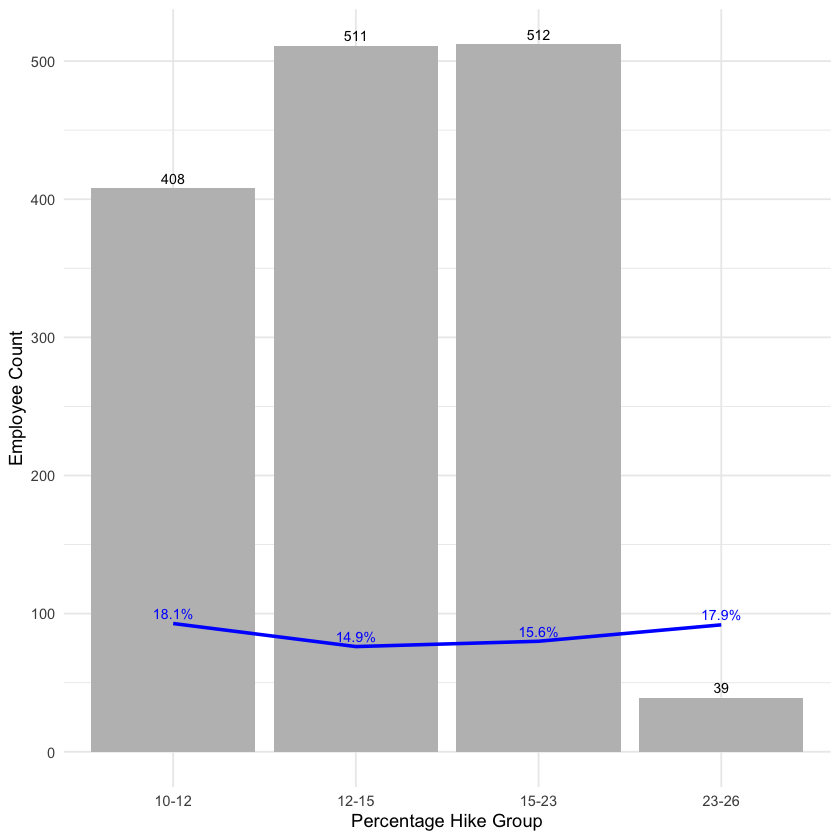

In [151]:
df2$Percent_Group <- cut(df2$PercentSalaryHike, breaks = c(10, 12, 15, 23, 26), labels = c("10-12", "12-15", "15-23", "23-26"))



percent_counts <- df2 %>%
  group_by(Percent_Group) %>%
  summarize(Count = n())


attrition_rate <- df2 %>%
  group_by(Percent_Group) %>%
  summarize(Attrition_Rate = mean(Attrition))


age_data <- merge(percent_counts, attrition_rate, by = "Percent_Group")


ggplot(age_data, aes(x = Percent_Group)) +
  geom_bar(aes(y = Count), stat = "identity", fill = "grey") +
  geom_line(aes(y = Attrition_Rate * max(percent_counts$Count), group = 1, color = "blue"), size = 1) +
  geom_text(aes(y = Count, label = Count), vjust = -0.5, color = "black", size = 3) +
  geom_text(aes(y = Attrition_Rate * max(percent_counts$Count), label = sprintf("%.1f%%", Attrition_Rate * 100)), vjust = -0.5, color = "blue", size = 3) +
  scale_color_identity() +
  labs(x = "Percentage Hike Group", y = "Employee Count", color = "Attrition Rate") +
  theme_minimal()

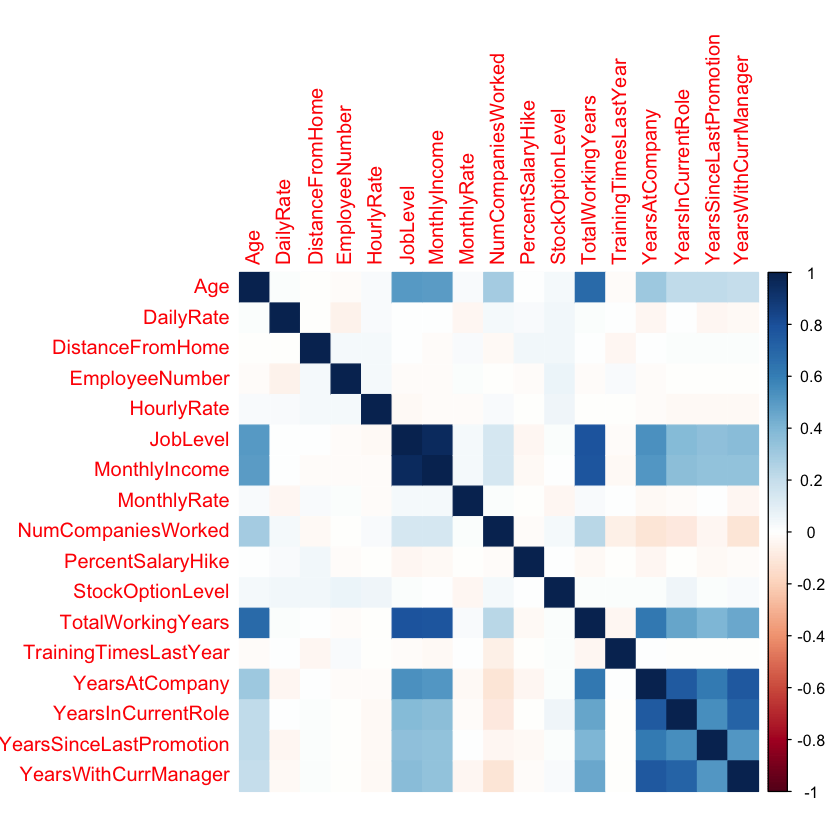

In [197]:
# Exclude categorical variables and additional variables
exclude_vars <- c("WorkLifeBalance", "RelationshipSatisfaction", "PerformanceRating", "JobRole", "MaritalStatus",
                  "JobSatisfaction", "JobInvolvement", "EnvironmentSatisfaction", "EducationField","EmployeeCount",
                  "Education", "Over18", "OverTime", "StandardHours", "Department","Attrition","BusinessTravel","Gender","Department")
df4_numeric <- df4[, !(names(df4) %in% exclude_vars)]

# Convert the remaining variables to numeric
df4_numeric <- as.data.frame(lapply(df4_numeric, as.numeric))

# Calculate the correlation matrix
cor_matrix <- cor(df4_numeric)


corrplot(cor_matrix, method = "color",col.axis = "black")

In [177]:
summary(df4_numeric)

      Age          DailyRate      DistanceFromHome EducationField EmployeeCount
 Min.   :18.00   Min.   : 102.0   Min.   : 1.000   Min.   : NA    Min.   :1    
 1st Qu.:30.00   1st Qu.: 465.0   1st Qu.: 2.000   1st Qu.: NA    1st Qu.:1    
 Median :36.00   Median : 802.0   Median : 7.000   Median : NA    Median :1    
 Mean   :36.92   Mean   : 802.5   Mean   : 9.193   Mean   :NaN    Mean   :1    
 3rd Qu.:43.00   3rd Qu.:1157.0   3rd Qu.:14.000   3rd Qu.: NA    3rd Qu.:1    
 Max.   :60.00   Max.   :1499.0   Max.   :29.000   Max.   : NA    Max.   :1    
                                                   NA's   :1470                
 EmployeeNumber     HourlyRate        JobLevel        JobRole    
 Min.   :   1.0   Min.   : 30.00   Min.   :1.000   Min.   : NA   
 1st Qu.: 491.2   1st Qu.: 48.00   1st Qu.:1.000   1st Qu.: NA   
 Median :1020.5   Median : 66.00   Median :2.000   Median : NA   
 Mean   :1024.9   Mean   : 65.89   Mean   :2.064   Mean   :NaN   
 3rd Qu.:1555.8   3rd Qu.: 83.

While establishing a correlation matrix for the non-categorical/text data, we identified variables with high correlation. These variables are primarily related to years within the company, manager, current role, and total working experience. Therefore, we should select certain variables and avoid selecting duplicates, as this may result in the independent variables incorrectly influencing the response.

Based on our initial high-level analysis, we've found that performance indicators may not independently drive attrition significantly. However, demographics and job motivation appear to have a strong relationship with attrition. This discovery provides a solid foundation for more advanced analysis.